# Exercício 5 - SME0130 - Redes Complexas

### Aluno: Luciano Augusto Campagnoli da Silva
### Número USP: 9313367

Importar bibliotecas.

In [3]:
from numpy  import *
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

np.random.seed(100)

## Questão 1

Gerar grafo aleatório no modelo Erdos-Renyi.

In [3]:
N = 1000
p = 0.1
av_degree = p * (N - 1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

Distribuição de grau.

In [1]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [7]:
ks, Pk = degree_distribution(GER)

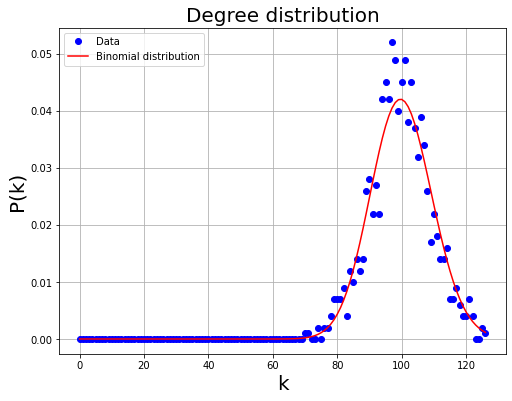

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, p)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

Segundo momento de distribuição de grau.

In [2]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [10]:
k2 = momment_of_degree_distribution(GER,2)
print('Second momment of P(k):', k2)

Second momment of P(k): 9976.292


Coeficiente de aglomeração médio.

In [11]:
avc = nx.average_clustering(GER)
print("Average clustering:", "%3.4f"%avc, '|p = ', p)

Average clustering: 0.0991 |p =  0.1


Alternativa correta: **a**.

## Questão 2

Rede *small-world*.

In [92]:
N = 1000
av_degree = 10
k = int(av_degree)
p = 0.1 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)


Distribuição de grau.

In [93]:
ks, Pk = degree_distribution(GWS)

Segundo momento da distribuição de grau.

In [94]:
k2 = momment_of_degree_distribution(GWS,2)
print('Second momment of P(k):', k2)

Second momment of P(k): 100.948


Coeficiente de aglomeração médio.

In [95]:
avc = nx.average_clustering(GWS)
print("Average clustering:", "%3.4f"%avc, '|p = ', p)

Average clustering: 0.4883 |p =  0.1


Alternativa correta: **d**.

## Questão 3

Rede aleatória Erdos-Reyni.

In [1]:
N = 1000
av_degree = 5 
p = av_degree/ (N - 1)

GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

NameError: name 'nx' is not defined

Entropia de Shannon.

In [12]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [13]:
H = shannon_entropy(GER)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  5.1994


Rede aleatória grau médio = 10.

In [14]:
N = 1000
av_degree = 10 
p = av_degree/ (N - 1)

GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [15]:
H = shannon_entropy(GER)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  3.7102


Rede aleatória grau médio = 50.

In [24]:
N = 1000
av_degree = 50 
p = av_degree/ (N - 1)

GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [25]:
H = shannon_entropy(GER)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  4.8256


Alternativa correta: **d**.

## Questões 4

Redes *small-world*.

### p = 0

In [96]:
N = 100
av_degree = 4
k = int(av_degree)
p = 0 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)


Menor distância média.

In [97]:
if nx.is_connected(GWS) == True:
    l = nx.average_shortest_path_length(GWS)
    print("Average shortest path length:", "%3.4f"%l)
else:
    Gcc=sorted(nx.connected_component_subgraphs(GWS), key = len, reverse=True)
    G=Gcc[0]
    print('We will use only the largest component')
    N = len(GWS)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    print('Average degre:', 2*M/N)
    l = nx.average_shortest_path_length(GER)
    print("Average shortest path length:", "%3.4f"%l)
print('The predicted value is log(N)/log(average degree)', log(N)/log(av_degree))


Average shortest path length: 12.8788
The predicted value is log(N)/log(average degree) 3.3219280948873626


### p = 0.01

In [98]:

p = 0.01 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)


In [99]:
if nx.is_connected(GWS) == True:
    l = nx.average_shortest_path_length(GWS)
    print("Average shortest path length:", "%3.4f"%l)
else:
    Gcc=sorted(nx.connected_component_subgraphs(GWS), key = len, reverse=True)
    G=Gcc[0]
    print('We will use only the largest component')
    N = len(GWS)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    print('Average degre:', 2*M/N)
    l = nx.average_shortest_path_length(GER)
    print("Average shortest path length:", "%3.4f"%l)
print('The predicted value is log(N)/log(average degree)', log(N)/log(av_degree))


Average shortest path length: 8.8760
The predicted value is log(N)/log(average degree) 3.3219280948873626


### p = 0.05

In [100]:

p = 0.05 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)


In [101]:
if nx.is_connected(GWS) == True:
    l = nx.average_shortest_path_length(GWS)
    print("Average shortest path length:", "%3.4f"%l)
else:
    Gcc=sorted(nx.connected_component_subgraphs(GWS), key = len, reverse=True)
    G=Gcc[0]
    print('We will use only the largest component')
    N = len(GWS)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    print('Average degre:', 2*M/N)
    l = nx.average_shortest_path_length(GER)
    print("Average shortest path length:", "%3.4f"%l)
print('The predicted value is log(N)/log(average degree)', log(N)/log(av_degree))


Average shortest path length: 9.1477
The predicted value is log(N)/log(average degree) 3.3219280948873626


### p = 0.1

In [102]:

p = 0.1 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)


In [103]:
if nx.is_connected(GWS) == True:
    l = nx.average_shortest_path_length(GWS)
    print("Average shortest path length:", "%3.4f"%l)
else:
    Gcc=sorted(nx.connected_component_subgraphs(GWS), key = len, reverse=True)
    G=Gcc[0]
    print('We will use only the largest component')
    N = len(GWS)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    print('Average degre:', 2*M/N)
    l = nx.average_shortest_path_length(GER)
    print("Average shortest path length:", "%3.4f"%l)
print('The predicted value is log(N)/log(average degree)', log(N)/log(av_degree))


Average shortest path length: 4.6539
The predicted value is log(N)/log(average degree) 3.3219280948873626


Alternativa correta: **d**.

# Questão 5

Redes Erdos-Reyni

### Grau médio = 5.

In [87]:
N = 1000
av_degree = 5
p = av_degree / (N - 1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [88]:
r=nx.degree_assortativity_coefficient(GER)
print("Assortativity = ","%3.4f"%r)

Assortativity =  0.0151


### Grau médio = 10.

In [89]:
av_degree = 10
p = av_degree / (N - 1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [90]:
r=nx.degree_assortativity_coefficient(GER)
print("Assortativity = ","%3.4f"%r)

Assortativity =  0.0028


### Grau médio = 50.

In [91]:
av_degree = 50
p = av_degree / (N - 1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [92]:
r=nx.degree_assortativity_coefficient(GER)
print("Assortativity = ","%3.4f"%r)

Assortativity =  0.0099


Alternativa correta: **c**.